# Hola Alejandro!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola, Alejandro, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los puedas tener en cuenta para la siguiente entrega. Quedo atento.~~ </div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General  #2
    
~~Hola, Alejandro, realizas un buen trabajo con las modificaciones en los datasets de órdenes y visitas. Ahora bien, es importante que el dataset de órdenes modificado lo conviertas en el que se usa para desarrollar los diferentes gráficos, de este modo, los cambios impactarán efectivamente en los resultados. Quedo atento para que puedas aplicar este cambio.~~ </div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General  #3
    
~~Hola, Alejandro, he dejado nuevos comentarios etiquetados con el #3 para que los puedas tener en cuenta.~~ </div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General  #4
    
Hola, Alejandro, te felicto por la culminación del proyecto. Muy buen trabajo. </div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Alejandro, es importante poder generar una sección de introducción para el desarrollo del proyecto. ~~

# Introduccion

En este proyecto vamos a priorizar las hipótesis que junto con el departamento de marketing se recopilaron para ayudar a aumentar los ingresos, lanzar un test A/B y analizar los resultados de este mismo.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto. </div>

In [2]:
hipotesis = pd.read_csv("/datasets/hypotheses_us.csv",sep=';')

ordenes = pd.read_csv("/datasets/orders_us.csv")

visitas = pd.read_csv("/datasets/visits_us.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo cargando los datasets necesarios para el desarrollo del proyecto. </div>

In [3]:
hipotesis.drop_duplicates()

print("\nValores faltantes en cada columna:")
print(hipotesis.isnull().sum())
    
print("\nNúmero de duplicados:")
print(hipotesis.duplicated().sum())

hipotesis.info()
hipotesis.head()


Valores faltantes en cada columna:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

Número de duplicados:
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo realizando esta exploración inicial para el dataset ``hipotesis``. </div>

In [4]:
ordenes.drop_duplicates()
ordenes['date'] = pd.to_datetime(ordenes['date'])

usuarios_a = ordenes[ordenes['group'] == 'A']['visitorId'].unique()
usuarios_b = ordenes[ordenes['group'] == 'B']['visitorId'].unique()

duplicate_users = set(usuarios_a) & set(usuarios_b)
ordenes = ordenes[~ordenes['visitorId'].isin(duplicate_users)]

print("\nValores faltantes en cada columna:")
print(ordenes.isnull().sum())
    
print("\nNúmero de duplicados:")
print(ordenes.duplicated().sum())

ordenes.info()
ordenes.head()


Valores faltantes en cada columna:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Número de duplicados:
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


<div class="alert alert-block alert-info">
<b>Con esto estariamos cumpliendo con la eliminacion de los datos A y B duplicados?</b> <a class="tocSkip"></a>
</div>

In [5]:
visitas.drop_duplicates()
visitas['date'] = pd.to_datetime(visitas['date'])

visitas = pd.merge(ordenes, visitas, on=['date', 'group'], how='left')

print("\nValores faltantes en cada columna:")
print(visitas.isnull().sum())
    
print("\nNúmero de duplicados:")
print(visitas.duplicated().sum())

visitas.info()
visitas.head()


Valores faltantes en cada columna:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
visits           0
dtype: int64

Número de duplicados:
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
 5   visits         1016 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 55.6+ KB


,transactionId,visitorId,date,revenue,group,visits
0,3667963787,3312258926,2019-08-15,30.4,B,544
1,2804400009,3642806036,2019-08-15,15.2,B,544
2,3797467345,1196621759,2019-08-15,155.1,B,544
3,2282983706,2322279887,2019-08-15,40.5,B,544
4,182168103,935554773,2019-08-15,35.0,B,544


<div class="alert alert-block alert-info">
<b>Realice un merge para unir las tablas de visitas y ordenes con los datos de los usuarios presentes en ambos grupos A y B, estaria esto correcto?</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

**Comentario Importante** 

~~Buen trabajo con el desarrollo del análisis exploratorio para los datasets de órdenes y visitas, sin embargo, hay un aspecto crucial que no estás cubriendo, el cual es importante para que los resultados de la sección de análisis de test A/B funcionen correctamente. Dicho aspecto es que elimines los usuarios que están presentes en los dos grupos (tanto en A como B), teniendo en cuenta lo anterior, después de que cubras ese aspecto, podremos continuar con la revisión de la sección de análisis test A/B.~~  </div>

In [6]:
hipotesis['ICE'] = (hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']
hipotesis_ice = hipotesis.sort_values(by='ICE', ascending=False)

print("\nHipótesis ordenadas por ICE:")
print(hipotesis_ice[['Hypothesis', 'ICE']])


Hipótesis ordenadas por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [7]:
hipotesis['RICE'] = (hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']
hipotesis_rice = hipotesis.sort_values(by='RICE', ascending=False)

print("\nHipótesis ordenadas por RICE:")
print(hipotesis_rice[['Hypothesis', 'RICE']])


Hipótesis ordenadas por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


~~Buen trabajo con el despliegue de los frameworks RICE e ICE, ahora bien, sería interesante poder generar observaciones sobre lo encontrado.~~ </div>

<div class="alert alert-block alert-info">
<b>Dos de las hipotesis que mas significancia en los frameworks RICE y ICE fueron "Add product recommendation blocks to the store..." "Add two new channels for attracting traffic". </b> <a class="tocSkip"></a>
</div>

#### Representa gráficamente el ingreso acumulado por grupo. 

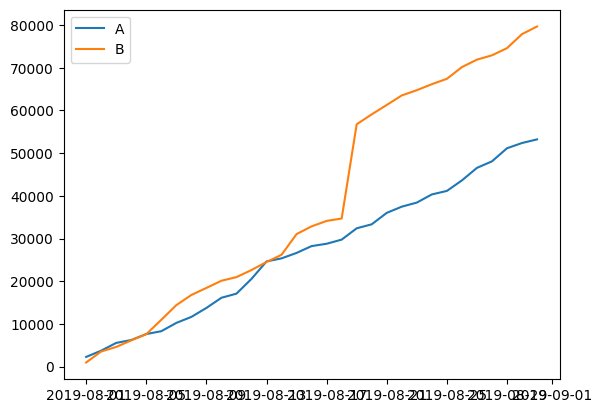

In [8]:
datesGroups = ordenes[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: ordenes[
        np.logical_and(
            ordenes['date'] <= x['date'], ordenes['group'] == x['group']
        )
    ].agg({'date': 'max','group': 'max','transactionId': pd.Series.nunique,'visitorId': pd.Series.nunique,'revenue': 'sum',}),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitas[
        np.logical_and(
            visitas['date'] <= x['date'], visitas['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del gráfico de los ingresos acumulados por grupo. </div>

#### Representa gráficamente el tamaño de pedido promedio acumulado por grupo.

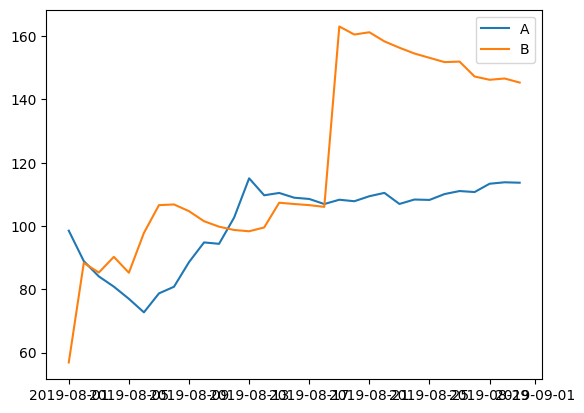

In [9]:
plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
    label='A',
)
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
    label='B',
)
plt.legend()


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del gráfico del tamaño de pedido promedio acumulado por grupo.  </div>

#### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

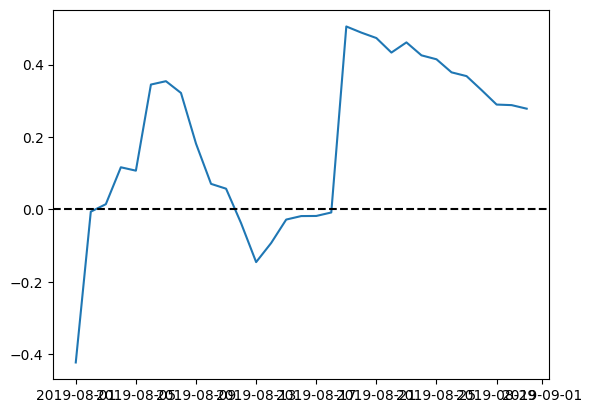

In [10]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['ordersA']
    )
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo desarrollando el cálculo y la gráfica de la diferencia relativa entre el tamaño de pedido promedio acumulado por grupo.  </div>

#### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. 

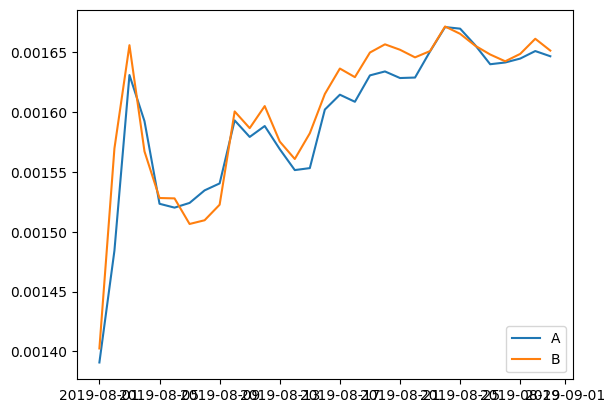

In [11]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del gráfico de las tasas de conversión diarias por grupo.   </div>

#### Traza un gráfico de dispersión del número de pedidos por usuario.

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


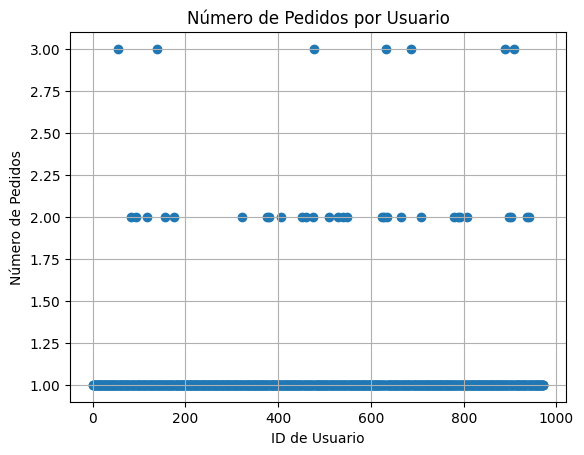

In [12]:
ordersByUsers = (
    ordenes.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Número de Pedidos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del gráfico para estudiar la dispersión del número de pedidos por cliente.  </div>

#### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [13]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]



<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del cálculo de los percentiles correspondientes.   </div>

#### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

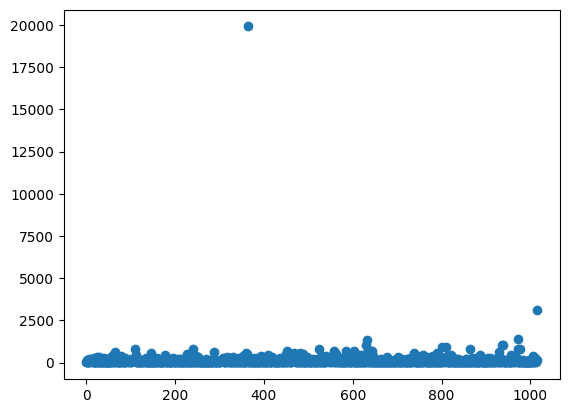

In [14]:
x_values = pd.Series(range(0,len(ordenes['revenue'])))

plt.scatter(x_values, ordenes['revenue'])


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del gráfico para estudiar la dispersión del precio de los pedidos.  </div>

#### Calcula los percentiles 95 y 99 de los precios de los pedidos.

In [15]:
print(np.percentile(ordenes['revenue'], [95, 99]))

[414.275 830.3  ]



<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


Perfecto, buen trabajo con el desarrollo del cálculo de los percentiles correspondientes.   </div>

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [16]:
ordersByUsersA = (
    ordenes[ordenes['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    ordenes[ordenes['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitas[visitas['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitas[visitas['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.80265
0.003


<div class="alert alert-block alert-info">
<b> No hay una diferencia significativa en el comportamiento de los usuarios en términos de número de pedidos entre los grupos A y B.  </b> <a class="tocSkip"></a>
</div>

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [17]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            ordenes[ordenes['group'] == 'A']['revenue'],
            ordenes[ordenes['group'] == 'B']['revenue'],
        )[1]
    )
)

0.862


<div class="alert alert-block alert-info">
<b> No hay evidencia suficiente para rechazar la hipotesis nula, no hay una diferencia significativa en las distribuciones de ingresos entre los grupos A y B </b> <a class="tocSkip"></a>
</div>

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [18]:
ordersByUsersA = (
    ordenes[ordenes['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    ordenes[ordenes['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = ordenes[ordenes['revenue'] > 10000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))


33      249864742
58      611059232
425    1920142716
211    2108163459
347    2742574263
dtype: int64


<div class="alert alert-block alert-info">
<b> El resultado muestra los primeros cinco identificadores de usuarios (visitorId) que han sido catalogados como "anormales". Estos usuarios tienen comportamientos que se destacan ya sea por realizar un número inusualmente alto de órdenes (mas de 2) o por haber realizado compras con un valor superior a 10000, por lo que si estos mismos afectaran nuestro estudio de caso seria prudente eliminar.</b> <a class="tocSkip"></a>
</div>

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. 

In [19]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitas[visitas['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitas[visitas['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(
    "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.73716
0.023


<div class="alert alert-block alert-info">
<b> Ambos grupos parecen tener comportamientos similares en terminos de pedidos realizados, y cualquier diferencia observada es probablemente debida al azar.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


~~Buen trabajo con el desarrollo de las secciones de estudio de las significancias estadísticas, ahora bien, no olvides generar observaciones sobre lo encontrado.~~ 

#### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

<div class="alert alert-block alert-info">
<b> A lo largo de los diferentes análisis, tanto antes como después de excluir a los usuarios anormales, los resultados no mostraron diferencias significativas entre los grupos. Dado que los resultados no muestran diferencias estadísticamente significativas entre los grupos A y B, se puede concluir que no hay evidencia suficiente para considerar que uno de los grupos es superior al otro en terminos de pedidos realizados, por ende, </b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>


~~No olvides desarrollar esta última sección de análisis. ~~